<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/TrajectoryAugmentation/AutoEncoder_CNN_GPS(256x256).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = "/content/drive/My Drive/University/PiLab/TrajectoryAugmentation/201605_Image/"

In [4]:
import os
import glob

os.chdir( data_dir )

files = glob.glob("*png")

In [5]:
import cv2

def get_im(path):
  img = cv2.imread(path, 0)
  resized = cv2.resize(img, (256, 256))
  return resized

In [6]:
X_train, X_test = [ ], [ ]

i = 0
for fl in files:
    img = get_im(fl)
    if i < 10:
        X_test.append( img )
        i += 1
    else:
        X_train.append(img)

In [7]:
X_train = np.array(X_train)
X_train = X_train.astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( len( X_train ), 256, 256, 1 ) )

print(np.array(X_train).shape)

(470, 256, 256, 1)


In [8]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import keras

In [9]:
input_img = Input(shape=(256, 256, 1))

# Encoding #
x = Conv2D( 64, ( 3, 3 ), activation = 'relu', padding = 'same' )( input_img )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = Conv2D( 32, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = Conv2D( 16, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

# Decoding #
x = Conv2D( 16, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

x = Conv2D( 32, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

x = Conv2D( 64, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

decoded = Conv2D( 1, ( 3, 3 ), activation = 'sigmoid', padding = 'same' )( x )

In [10]:
autoencoder = keras.models.Model( input_img, decoded )
autoencoder.compile( optimizer = 'adam', loss = 'binary_crossentropy' )

In [11]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)       

In [12]:
history = autoencoder.fit( X_train, X_train, epochs = 50, batch_size = 20, shuffle = True )

Epoch 1/50
24/24 [==============================] - 5s 212ms/step - loss: 0.1561
Epoch 2/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0265
Epoch 3/50
24/24 [==============================] - 4s 177ms/step - loss: 0.0142
Epoch 4/50
24/24 [==============================] - 4s 177ms/step - loss: 0.0122
Epoch 5/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0116
Epoch 6/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0102
Epoch 7/50
24/24 [==============================] - 4s 175ms/step - loss: 0.0082
Epoch 8/50
24/24 [==============================] - 4s 177ms/step - loss: 0.0070
Epoch 9/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0066
Epoch 10/50
24/24 [==============================] - 4s 175ms/step - loss: 0.0064
Epoch 11/50
24/24 [==============================] - 4s 175ms/step - loss: 0.0062
Epoch 12/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0060
Epoch 13/50
24/24 [======

In [13]:
X_test = np.array( X_test )
X_test = X_test.astype('float32') / 255.
X_test = np.reshape( X_test, ( len( X_test ), 256, 256, 1 ) )

In [14]:
decoded_imgs = autoencoder.predict( X_test )

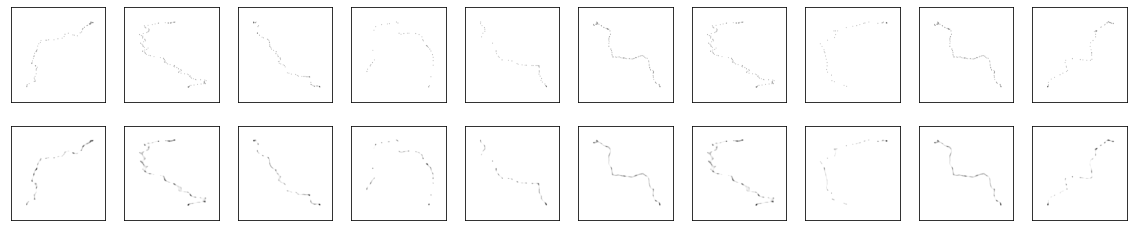

In [15]:
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(256 , 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot( 2, n, i + 1 + n )
    plt.imshow( decoded_imgs[i].reshape( 256, 256 ) )
    plt.gray()
    ax.get_xaxis().set_visible( False )
    ax.get_yaxis().set_visible( False )
plt.show()